In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [105]:
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
bs = np.random.uniform(-10, 10, (observations,1))

inputs = np.column_stack((xs,zs, bs))
noise = np.random.uniform(-1, 1, (observations,1))

In [106]:
variables = np.array([xs, zs, bs])
variables = np.reshape(variables, (3,1000))

In [116]:
# user set targets
target_weights = np.array([2, -3, 6])
target_weights = np.reshape(target_weights, (1,3))
target_bias = 5

#targets = 2*xs - 3*zs + 6*bs + target_bias + noise
targets = np.dot(target_weights, variables)+ target_bias
targets = np.reshape(targets, (1000, 1))

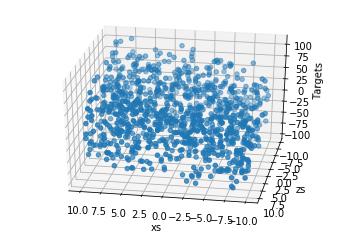

In [117]:
targets = targets.reshape(observations,)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(xs, zs, targets)

ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')

ax.view_init(azim=100)

plt.show()
targets = targets.reshape(observations,1)

In [118]:
# Initialise weights and biases within a range
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(3, 1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)

In [119]:
# learning rate
learning_rate = 0.02

In [124]:
# Learning loop
for i in range (100):
    
    # This is the linear model: y = xw + b equation
    outputs = np.dot(inputs,weights) + biases
    
    # The deltas are the differences between the outputs and the targets
    deltas = outputs - targets
    
    #loss function
    loss = np.sum(deltas ** 2) / 2 / observations
    
    # Print loss function?
    #print (loss)
    
    #scaling deltas
    deltas_scaled = deltas / observations
    
    # gradient descent for weights and biases
    weights = weights - learning_rate * np.dot(inputs.T,deltas_scaled)
    biases = biases - learning_rate * np.sum(deltas_scaled)
    

print("Final loss function: ", round(loss,4))
    


Final loss function:  0.0


In [125]:
# Ideally should be close to the target weights and biases
print (weights, biases)

[[ 1.99999964]
 [-2.99999826]
 [ 5.9999983 ]] [4.99977981]


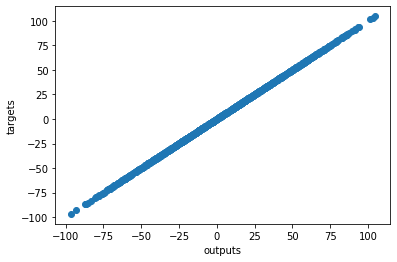

In [126]:
plt.scatter(outputs,targets)
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()